In [ ]:
import cv2 as cv
import skimage
from skimage.filters import frangi
import skimage.morphology as mp
from glob import glob
from matplotlib import pyplot as plt
import numpy as np

In [210]:
def preprocess(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.GaussianBlur(img, (13, 13), 0)
    plt.figure()    
    plt.imshow(img, 'gray')
    img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 35, 2)
    img = 255 - img
    plt.figure()    
    plt.imshow(img, 'gray')
    
    mask = np.zeros_like(img)
    contours = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    area_thresh = 200
    for cntr in contours:
        area = cv.contourArea(cntr)
        if area > area_thresh:
            cv.drawContours(mask, [cntr], -1, 255, 2)
    
    img = cv.bitwise_and(img, mask)
    kernel = np.ones((5,5), np.uint8)
    img = cv.dilate(img, kernel, iterations=1)
    
    plt.figure()    
    plt.imshow(img, 'gray')
    return img

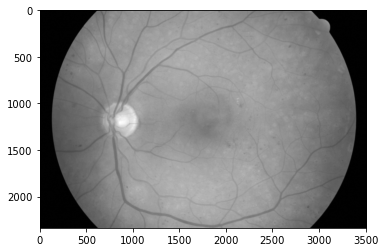

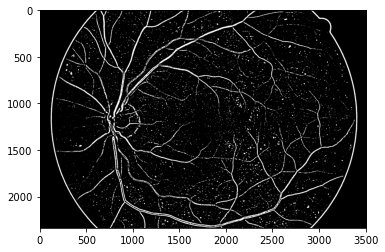

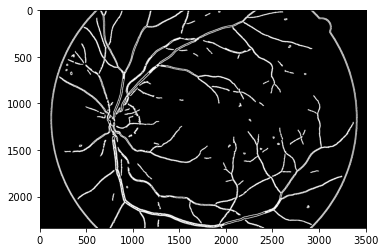

In [212]:
files = glob('images/*')
#print(files)
for file in files:
    img = cv.imread(file)
    #img = cv.resize(img, (1500,1500))
    img = preprocess(img)
    break